# DIGIT RECOGNIZER (#1)

In [1]:
cd /content/drive/MyDrive/Colab_Notebooks/CV/Projects/Digit_Recognizer

/content/drive/MyDrive/Colab_Notebooks/CV/Projects/Digit_Recognizer


In [2]:
pwd

'/content/drive/MyDrive/Colab_Notebooks/CV/Projects/Digit_Recognizer'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np 
from sklearn.metrics import accuracy_score

## Data

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

In [ ]:
X = df.iloc[:,1:] #features
y = df.iloc[:,0]  #labels

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((33600, 784), (8400, 784))

In [ ]:
def show_data(X, n=5, height=28, width=28, title=""):
  plt.figure(figsize=(10, 3))
  for i in range(n):
    ax = plt.subplot(1, n, i+1)    
    plt.imshow(X.iloc[i].values.reshape((height, width)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.suptitle(title, fontsize = 20)

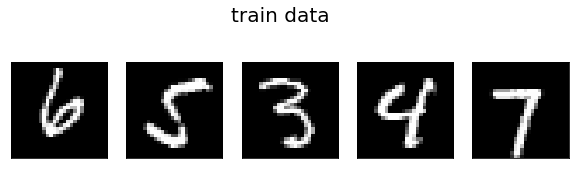

In [ ]:
show_data(X_train, title="train data")

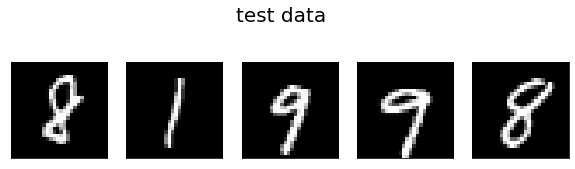

In [ ]:
show_data(X_test, title="test data")

## PCA

### Train Data

In [ ]:
# STEP-1: Apply standard scaling
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)

In [ ]:
# STEP-2: PCA 
## Step i - Find Covariance Matrix
## Step ii - Find Eigen Values and Eigen Vectors
## Step iii - Transform Data
#noc = None
noc = idx
pca = PCA(n_components=noc)
X_train_trf = pca.fit_transform(X_train_scl)

In [ ]:
# Eigen Values (eval-1>eval-2>...>eval-n)
pca.explained_variance_.shape

(222,)

In [ ]:
# Eigen Vectors
pca.components_.shape

(222, 784)

#### Optimum no. of PCs (total explained variance should be at least 90%)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

In [ ]:
np.where(np.cumsum(pca.explained_variance_ratio_)>0.9)

(array([222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
        235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
        248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
        261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
        274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
        287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
        300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
        313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
        326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
        339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
        352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
        365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
        378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
        391, 392, 393, 394, 395, 396, 397, 398, 399

In [ ]:
idx = np.where(np.cumsum(pca.explained_variance_ratio_)>0.9)[0][0]
idx, np.cumsum(pca.explained_variance_ratio_)[idx]
#goto PCA->Train Data and update 'noc' from 'None' to 'idx'

(222, 0.900132477505817)

In [ ]:
# Transformed data
df_X_train_trf = pd.DataFrame(data=X_train_trf, columns=["PC{0}".format(i+1) for i in range(noc)])
df_X_train_trf['label'] = np.array(y_train)
df_X_train_trf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200,PC201,PC202,PC203,PC204,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,PC213,PC214,PC215,PC216,PC217,PC218,PC219,PC220,PC221,PC222,label
0,-2.718633,-0.489824,1.135496,9.059188,-3.827893,1.158451,-0.542632,-0.534144,-3.368415,2.540688,-3.250127,2.876490,-0.451667,1.256838,1.828264,0.414701,0.959750,2.964896,-1.356532,-1.023318,-0.599684,-0.893055,0.039278,-2.072318,0.775410,-1.335644,-0.504920,-1.484994,0.407134,-0.314995,-1.777152,-0.924669,0.613027,-1.477572,-3.273202,1.465279,-1.146143,3.509634,-0.959153,0.097984,...,-0.226687,-0.949841,-0.931807,1.023981,0.969136,-0.181473,1.182302,-1.555272,1.123023,0.704481,-0.306782,1.018690,0.056514,0.544049,0.489685,1.293814,1.341290,-0.592763,-0.528206,-0.414475,-0.573633,0.512735,-0.773142,0.958762,0.148322,-0.546627,1.600452,-2.091892,-0.589007,-0.154319,0.392124,0.562406,-0.261090,0.558913,-0.124083,0.724970,0.237621,-0.192830,-0.449292,6
1,-0.676980,-6.753625,-2.335901,-7.169669,2.109082,-2.892468,0.451783,-1.145063,3.475792,0.465019,2.708908,-1.783585,6.589530,-0.066542,1.113772,1.359442,0.499534,0.465204,-0.619714,3.274892,0.254409,-0.247279,0.222564,-1.427076,1.546056,-0.506898,-2.232638,-0.326902,-1.792503,0.758504,1.353831,-0.859890,1.484011,-1.058874,-0.101671,-0.293657,-0.264338,1.523192,0.101470,0.347022,...,0.318657,0.530272,0.002261,-0.231120,-0.273498,0.399490,0.365354,0.115826,0.288714,-0.364328,-0.269612,-0.504848,-0.091278,0.120784,0.074425,-0.096206,0.258941,-0.451983,-0.110487,0.239199,0.098705,-0.394522,-0.335744,0.613765,0.712281,-0.007188,-0.082654,-0.119410,1.006076,0.082375,0.217615,0.260169,0.573158,-0.738284,0.813821,-0.251625,0.390053,-0.537370,-0.603136,5
2,-3.033233,6.509816,7.491830,-6.430478,-0.032836,-3.360743,1.727904,0.335428,3.753352,5.769083,0.616038,-1.607358,-2.028019,-1.224905,-2.266193,-0.251332,-4.680960,-0.222251,-1.538192,-1.853342,2.602427,0.973259,-0.592198,-2.378172,-0.178007,-1.599751,-0.654351,2.331045,0.096496,-0.116204,0.201048,-1.661447,1.065162,0.401490,-1.178069,-1.389311,0.191667,0.898414,-0.812964,-0.178548,...,0.639433,0.742214,0.075601,-0.380852,-0.007243,1.029030,0.092183,0.300110,-1.084856,0.356575,0.735392,1.245967,-0.438266,-0.400733,-0.946471,0.261449,-0.216437,-1.354433,-0.710843,0.274825,0.001939,-0.266220,0.113390,0.732142,1.059101,1.765761,0.109069,-0.422073,-0.963114,-1.417832,0.332451,0.032436,-0.894622,0.866451,0.273003,0.181888,-0.261157,0.446399,1.221495,3
3,-0.203482,5.414383,-7.820158,1.163057,-2.444970,1.275366,0.578152,-6.600110,-3.378175,1.909976,3.892911,-1.727785,1.797635,-0.314246,1.887337,3.050178,-0.289762,-1.268216,0.066842,0.646298,-0.767459,0.338619,-1.891972,1.647989,-2.765953,0.065953,-0.911319,-2.141873,0.269955,-0.679531,-0.512241,0.680352,-1.443187,0.895784,-0.309169,-0.689085,0.973217,-0.922154,1.224784,-1.442708,...,0.096174,0.689749,-0.442080,0.573334,-0.560693,0.797808,0.647779,-0.006412,0.094522,0.870188,-0.001028,0.689955,0.930034,-0.224685,-1.210820,0.660967,0.348935,-0.467627,-0.082950,0.686649,0.201457,0.767857,0.053202,-0.668610,1.051307,0.579810,-0.120317,0.605018,0.486011,0.247355,0.632546,-0.090861,-0.132121,-0.456292,0.550513,-0.169903,-0.160128,0.649404,0.051378,4
4,-7.574496,5.609416,-6.367215,-0.180995,3.775585,1.073222,-3.932494,6.891242,-3.428292,-2.168984,3.414914,-2.465829,1.685964,-1.720376,-0.190387,1.733426,3.022717,1.990618,-3.304656,-2.272971,-2.733126,-1.299903,-0.930722,3.818926,4.720945,2.214434,-2.164853,0.921083,-1.843664,1.928655,-2.480373,-3.751424,-1.132425,4.906642,2.276557,-2.535029,-2.227771,0.918589,2.631860,1.226276,...,-0.154745,-0.661038,0.420314,0.354849,-0.473878,-0.761726,0.884512,0.364776,0.547266,0.336183,0.840480,-0.736404,1.036809,0.127585,0.020573,4.1615

In [ ]:
# plt.scatter(x=X_train_trf[:,0], y=X_train_trf[:,1], c=y_train, cmap='viridis')

### Test Data

In [ ]:
X_test_scl = scaler.transform(X_test)
X_test_trf = pca.transform(X_test_scl)

In [ ]:
df_X_test_trf = pd.DataFrame(data=X_test_trf, columns=["PC{0}".format(i+1) for i in range(noc)])
df_X_test_trf['label'] = np.array(y_test)
df_X_test_trf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200,PC201,PC202,PC203,PC204,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,PC213,PC214,PC215,PC216,PC217,PC218,PC219,PC220,PC221,PC222,label
0,-5.006698,-2.630198,2.709408,1.159013,-0.814029,1.482348,-2.067557,-1.005050,-2.320581,-3.958932,-1.183561,-0.275058,1.481795,-0.270096,2.068254,1.814011,-1.723911,1.993438,0.677711,-0.519035,-0.461857,2.650983,-1.824252,0.901307,-0.198765,-0.305086,-1.435632,-0.838797,0.148043,-0.726539,-0.160674,-0.044635,0.592264,-0.500630,0.917784,-1.541287,-0.580071,-1.952751,-2.029457,0.249044,...,0.161758,-0.500908,-0.406222,0.524837,0.685789,0.101668,0.121990,-0.199731,-0.855121,-0.176631,-0.021260,0.342332,-0.077788,-0.321603,0.530174,-0.516605,-0.462821,-0.182868,0.088986,-0.660401,-0.469973,-0.780325,-0.724464,0.405842,-1.032845,-0.731720,0.088985,-0.264803,-0.476775,0.483179,0.653062,-0.296652,-0.894218,0.023392,0.762385,0.414779,-0.261642,0.084384,-0.210029,8
1,-7.757798,-1.474226,2.831735,1.892707,6.752068,-3.586657,1.146839,-0.839711,-0.107462,0.186874,-2.630853,-0.880812,-0.555276,0.249797,-0.521432,0.080621,-0.910441,-0.691830,0.147711,0.478156,0.177175,-1.560398,1.863062,0.408042,-0.337545,0.671909,1.061465,-0.554269,0.597194,-0.790201,0.005495,-0.430763,0.126863,0.028770,0.358450,0.243040,-0.215670,1.230941,-0.858879,0.271450,...,0.102600,0.448627,0.091837,-0.088149,-0.610403,0.546947,0.142304,0.255616,0.382950,0.032565,-0.117051,-0.174269,0.171474,-0.107589,-0.226511,0.574029,0.426843,0.325979,-0.381724,0.715751,0.265937,0.309969,0.125184,0.444026,-0.061900,-0.152843,-0.282071,-0.628706,0.370675,-0.194294,0.038878,-0.049241,0.370688,-0.277647,0.138322,-0.365534,-0.260831,0.175449,-0.368048,1
2,-7.472851,1.618302,-5.403513,-0.786704,-1.672329,-0.956318,-4.288460,3.055963,0.227397,0.713351,3.537398,-3.568428,-2.229419,-2.661771,-0.198624,0.568076,3.498776,4.096993,-0.628143,-1.839933,0.327768,1.733717,-0.465336,1.153859,1.675455,0.415628,-0.396348,1.881692,-1.485204,1.401169,-1.932535,-0.606950,0.627552,0.245060,0.705077,-2.087121,-0.777101,1.121730,0.837929,1.340166,...,0.087753,1.267383,0.045386,-0.495324,0.234358,-0.256713,0.522523,0.308586,0.236103,-1.371579,-0.785079,-0.192116,-0.102056,-0.886581,-0.426420,0.110854,0.054396,0.043765,0.415802,-0.109813,0.193963,-0.020232,-0.396648,0.065042,-0.379549,0.188501,-0.126270,0.393473,0.424414,0.854510,-0.340474,-0.627036,-0.432145,0.022941,0.288272,0.374841,0.209092,-0.156808,-0.104629,9
3,-4.041453,6.380914,-7.693970,-1.589376,-2.494940,-3.024158,0.598185,3.524782,-3.137251,0.883457,5.959259,1.507416,1.356384,-3.938519,0.712901,0.648709,1.413863,2.875510,1.135253,-3.957800,0.180062,-4.669261,-5.349962,3.522231,2.651735,0.797920,-2.611141,-4.497538,0.060317,1.160284,0.634445,-1.646118,-2.717998,2.695292,1.446228,-1.893055,-4.568917,6.222804,-2.816844,-0.587895,...,0.066649,-1.800464,1.712982,2.173409,-0.464271,0.114433,-0.051988,0.820944,0.314434,-0.766217,1.117825,-0.804650,0.432054,-0.884771,-0.668959,2.164400,-0.736418,-0.830263,0.352601,0.936958,0.137954,-0.914092,-1.103804,-1.203100,-0.813214,0.154312,-0.181805,0.630248,0.473302,0.735528,0.901976,-0.949492,0.333946,-0.305392,-1.306819,-0.303073,-1.088621,0.325025,-2.268811,9
4,-3.519540,-5.091133,-2.177737,-2.715531,-1.098642,2.470262,-1.306113,-2.780159,1.522358,-0.216081,-0.337009,-0.063635,2.826054,0.573230,1.835197,4.485843,-0.939534,0.874308,1.994788,0.524534,0.960345,1.696422,-0.134933,-0.379930,1.454128,-1.462535,0.065117,-2.238678,-2.867010,-0.121858,-0.541005,-1.084970,0.062779,-1.758232,0.517515,-1.198171,0.656601,1.422851,-0.661750,-0.548658,...,-0.042454,0.408125,0.162904,-0.230220,-0.316915,-0.537630,0.941755,-0.196494,0.022013,-0.080936,-0.226269,0.614570,-0.693464,0.912461,0.7669

## Prediction

In [ ]:
n = 4200 #testing samples

In [ ]:
euc_dist_mat = []
for i in range(n):
  X_test_i = X_test_trf[i,:]
  euc_dist = []
  for j in range(X_train_trf.shape[0]):
    X_train_j = X_train_trf[j,:]
    euc_dist.append(np.linalg.norm(X_test_i - X_train_j))
  min_euc_dist = min(euc_dist)  
  euc_dist.append(min_euc_dist)
  idx_min_euc_dist = euc_dist.index(min_euc_dist)
  label_pred = df_X_train_trf.loc[idx_min_euc_dist, 'label']
  euc_dist.append(label_pred)
  euc_dist_mat.append(euc_dist)

euc_dist_mat = np.array(euc_dist_mat)
euc_dist_mat

array([[21.88379428, 22.34124463, 25.3589327 , ..., 38.53470739,
         8.54607449,  8.        ],
       [22.30748164, 22.33664197, 22.98071017, ..., 37.79896423,
         2.43970193,  1.        ],
       [25.60581955, 24.8775303 , 25.87289746, ..., 40.07636997,
         3.8566721 ,  9.        ],
       ...,
       [37.3600047 , 36.97779127, 37.54271148, ..., 45.16673589,
        12.25397434,  7.        ],
       [40.45668079, 39.5372937 , 41.30751777, ..., 45.76156687,
        16.98490414,  7.        ],
       [27.88288991, 19.82897355, 26.3605619 , ..., 32.49574433,
        12.64466662,  5.        ]])

In [ ]:
euc_dist_mat.shape

(4200, 33602)

In [ ]:
y_true = np.array(y_test[:n])
y_pred = euc_dist_mat[:,-1]
y_true.shape, y_pred.shape

((4200,), (4200,))

### Accuracy Score

In [ ]:
accuracy_score(y_true, y_pred)

0.9438095238095238